# Simulación de NTSC en python

para entender la norma lo mejor es simularla y contruir una señal en base a una foto por ejemplo

In [31]:
## los import de rigor

from PIL import Image
from array import array
import math
import numpy as np
import matplotlib.pyplot as plt


La imagen tiene una resolucion de ancho 640 , alto 480
son 307200 elementos de imagen


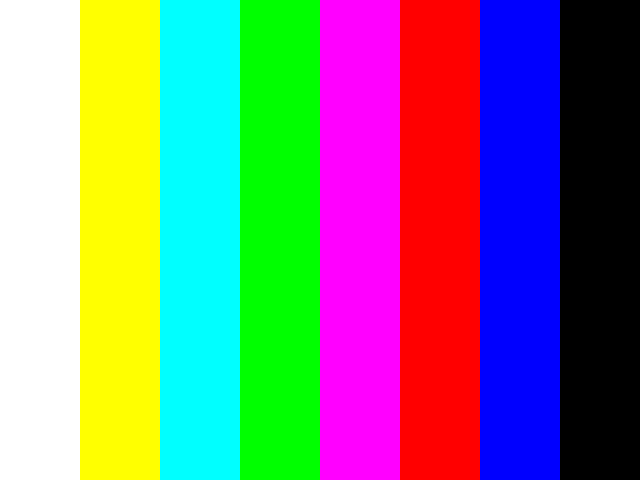

In [32]:
image = Image.open("barras.png")
print("La imagen tiene una resolucion de ancho {} , alto {}".format(image.size[0],image.size[1]))
pixels = list(image.getdata())
print("son {} elementos de imagen".format(len(pixels)))

display(image)

In [33]:
#Antes de convertir la imagen definir el n° de pixeles que tiene...
PIXELES_W=image.size[0] #numero de pixeles de ancho
PIXELES_H=image.size[1] #numero de pixeles de alto

In [34]:
pixels

[(255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255

La recomendacion ITU-R BT.470-6 define las caracteristicas de los sistemas de television analogicas

<img src="0.jpeg" width=700 height=700>


In [35]:
COLOR_FREQ = 3579545.0 # frecuencia de portadora de color NTSC
FRECUENCIA_CAMPO=59.94 # frecuencia de los campos
NUMERO_LINEAS = 525

SAMPLES_PER_LINE = 772   # ITU-R.BT.601 recomienda 720 muestras por linea

SAMP_RATE = SAMPLES_PER_LINE *FRECUENCIA_CAMPO * NUMERO_LINEAS / 2

RADIANS_PER_SAMPLE = 2 * np.pi * COLOR_FREQ / SAMP_RATE

print("sample rate =",SAMP_RATE)
ts=1/SAMP_RATE
print("ts",ts)

sample rate = 12146841.0
ts 8.232593149115889e-08


<img src="2.jpeg" width=560 height=560 >

In [36]:
## en python el producto de listas concatena

[1,2,3]*3

[1, 2, 3, 1, 2, 3, 1, 2, 3]

In [37]:
NIVEL_SINC = -300  
NIVEL_NEGRO = 0
NIVEL_BORRADO = 0
NIVEL_BLANCO = 700


## Pulso de sincronismo Vertical

Esta formado por 6 pulso de pre-ecualizacion cuya funcion es descargar el integrador con pulsos de bajo ciclo de actividad y a su vez no perder el sincronismo horizontal, para prepararlo para la recepcion de los pulsos de sincronismo.

Los pulsos de sincronismo estan compuesto por 6 pulsos de mayor ciclo de actividad que logran cargar el


<img src="1.jpeg" width=500 height=500>
<img src="3.jpeg" width=500 height=500>

In [38]:
### ARMADO DEL PULSO DE PRE/POST EQUALIZACION

# duracion de una linea
H=63.492e-6
# duracion del pulso de equ
p=2.3e-6

NH=int(round(H/ts,0))
print("numero de muestras de una linea",NH)

# duracion del pulso de sincronismo horizontal
#a=10.9e-6
#Na=int(round(a/ts,0))
#print("numero de muestras del pulso de sincronismo horizontal",Na)
#print("numero de muestras de una linea activa",NH-Na)


Np=int(round(p/ts,0))
Nbp=int(round((NH/2)-Np,0))
print("nuemro de muestras del pulso de eq",Np)
print("numero de muestra en nivel de negro del eq",Nbp)


numero de muestras de una linea 771
nuemro de muestras del pulso de eq 28
numero de muestra en nivel de negro del eq 358


In [39]:
PULSO_EQ=[NIVEL_SINC] * Np + [NIVEL_BORRADO] * Nbp

In [40]:
### ARMADO DEL PULSO DE SINCRONISMO VERTICAL
q=27.1e-6
Nq=int(round(q/ts,0))
Nbq=int(round((NH/2)-Nq,0))
print("nuemro de muestras del pulso de sinc V",Nq)
print("numero de muestra en nivel de negro del sic V",Nbq)

nuemro de muestras del pulso de sinc V 329
numero de muestra en nivel de negro del sic V 56


In [41]:
PULSO_SINC_V=[NIVEL_SINC] * Nq + [NIVEL_BORRADO] * Nbq

In [42]:
INTERVALO_V=PULSO_EQ*6+PULSO_SINC_V*6+PULSO_EQ*6

longitud del borrado vertical 571.506616411625 us


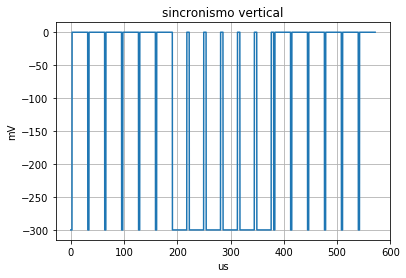

In [43]:
plt.plot(np.linspace(0,(len(INTERVALO_V)*ts*1e6),len(INTERVALO_V)),INTERVALO_V)
plt.title("sincronismo vertical")
plt.ylabel("mV")
plt.xlabel("us")
#plt.ylim((-300,1000))
plt.grid()
print("longitud del borrado vertical {} us".format(len(INTERVALO_V)*ts*1e6))



<img src="5.jpeg" width=500 height=500>

In [44]:
MEDIALINEA_EXTRA=[NIVEL_BORRADO] *int(round(NH/2,0))
print("muestras",int(round(NH/2,0)))

muestras 386


## Pulso de sincronismo horizontal


<img src="4.jpeg" width=500 height=500 />
<img src="2.jpeg" width=500 height=500 />


In [45]:
### PORTICO FRONTAL
c=1.5e-6

Nc=int(round(c/ts,0))
print("nuemro de muestras del portico anterior",Nc)

nuemro de muestras del portico anterior 18


In [46]:
PORTICO_FRONTAL=[NIVEL_BORRADO] * Nc

In [47]:
#### pulso de sincronismo horizontal
d=4.7e-6  

Nd=int(round(d/ts,0))
print("nuemro de muestras del pulso de sincronismo horizontal",Nd)

nuemro de muestras del pulso de sincronismo horizontal 57


In [48]:
PULSO_SINC_H=[NIVEL_SINC]*Nd

nuemro de muestras del antes del burst 13
nuemro de muestras del burst 31
nuemro de muestras despues del burst 13
duracion del portico porterior:  4.692578094996057e-06


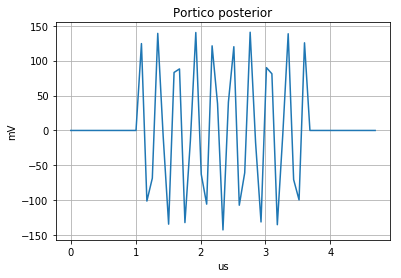

In [49]:
#### FUNCIONE PORTICO POSTERIOR ####

g=5.8e-6
Ng=int(round(g/ts,0))
print("nuemro de muestras del antes del burst",Ng-Nd)

h=2.53e-6
Nh=int(round(h/ts,0))
print("nuemro de muestras del burst",Nh)

b=9.4e-6
Nb=int(round(b/ts,0))
print("nuemro de muestras despues del burst",Nb-Ng-Nh)

print("duracion del portico porterior: ",(Ng-Nd+Nh+Nb-Ng-Nh)*ts)

BURST_LEVEL=285/2

def addPorticoPosterior():
    global ntsc_signal
    ntsc_signal += [NIVEL_BORRADO] * int(Ng-Nd)
    l=len(ntsc_signal)
    for x in range(l, l+Nh):
        ntsc_signal += [NIVEL_BORRADO + BURST_LEVEL * np.sin(np.pi + RADIANS_PER_SAMPLE * x)]
    ntsc_signal += [NIVEL_BORRADO] * int(Nb-Ng-Nh)


ntsc_signal=[]
addPorticoPosterior()
plt.title("Portico posterior")
plt.xlabel("us")
plt.ylabel("mV")
plt.grid()
plt.plot(np.linspace(0,len(ntsc_signal)*ts*1e6,len(ntsc_signal)),ntsc_signal)



duracion del borrado horizontal 10.867022956832974 us
132


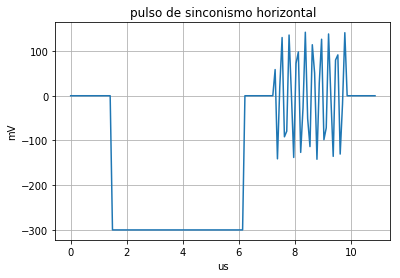

In [50]:
### pulso de sincronismo horizontal
ntsc_signal=[]
ntsc_signal+=PORTICO_FRONTAL
ntsc_signal+=PULSO_SINC_H
addPorticoPosterior()

plt.title("pulso de sinconismo horizontal")
plt.plot(np.linspace(0,len(ntsc_signal)*ts*1e6,len(ntsc_signal)),ntsc_signal)
plt.xlabel("us")
plt.ylabel("mV")
plt.grid()

print("duracion del borrado horizontal {} us".format(len(ntsc_signal)*ts*1e6))
print(len(ntsc_signal))
Na=len(ntsc_signal)


# Lineas no visibles

In [51]:
### AGREGA LINEAS NO VISIBLES  ###

def addLineasNoVisibles():
    global ntsc_signal
    ntsc_signal+=PORTICO_FRONTAL
    ntsc_signal+=PULSO_SINC_H
    addPorticoPosterior()
    ntsc_signal+=[NIVEL_NEGRO] * int(NH-Na)



duracion de la lina no visible 761.9264959506755 us


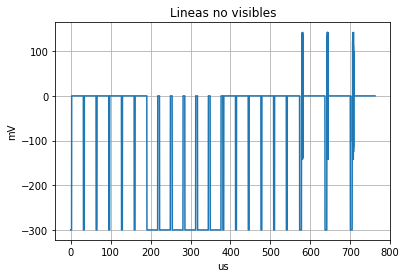

In [52]:
### testeo de las lineas no visibles
ntsc_signal=[]
ntsc_signal += INTERVALO_V
for lineas in range (3):
    addLineasNoVisibles()

plt.title("Lineas no visibles")
plt.plot(np.linspace(0,len(ntsc_signal)*ts*1e6,len(ntsc_signal)),ntsc_signal)
plt.xlabel("us")
plt.ylabel("mV")
plt.grid()

print("duracion de la lina no visible {} us".format(len(ntsc_signal)*ts*1e6))

# Offset de media linea para el barrido entrelazado

In [53]:
def addPrimerMediaLinea():
    global ntsc_signal
    ntsc_signal += PULSO_SINC_H
    addPorticoPosterior()
    ntsc_signal += [NIVEL_NEGRO] * int((NH-Na)/2)



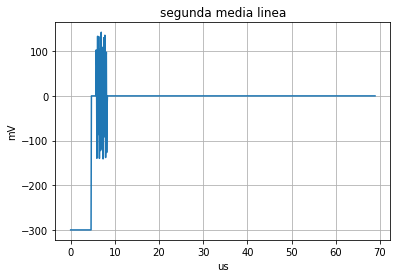

In [54]:
def addSegundaMediaLinea():
    global ntsc_signal
    ntsc_signal += PULSO_SINC_H
    addPorticoPosterior()
    ntsc_signal += [NIVEL_BORRADO] * int((NH-Na)/2) + [NIVEL_NEGRO] *int(round(NH/2,0)) + PORTICO_FRONTAL


ntsc_signal=[]
addSegundaMediaLinea()
plt.title("segunda media linea")
plt.plot(np.linspace(0,len(ntsc_signal)*ts*1e6,len(ntsc_signal)),ntsc_signal)
plt.xlabel("us")
plt.ylabel("mV")
plt.grid()



## Adicion de la informacion de color

<img src="6.jpeg" width=700 height=700 />


In [55]:
### FUNCIONES  ###

def addPixel(p):
  global ntsc_signal, BLACK_LEVEL, WHITE_LEVEL
  Er = float(p[0]) / 255
  Eg = float(p[1]) / 255
  Eb = float(p[2]) / 255

    
  ## de acuerdo a la norma
  Ey = 0.299 * Er + 0.587 * Eg + 0.114 * Eb  # informacion de luminancia
  Ei = -0.27 * (Eb - Ey) + 0.74 * (Er - Ey)
  Eq = 0.41 * (Eb - Ey) + 0.48 * (Er - Ey)  

  fase = RADIANS_PER_SAMPLE * len(ntsc_signal) + (33.0 / 180 * np.pi)
  Em = Ey + Eq * np.sin(fase) + Ei * np.cos(fase)

  ntsc_signal += [NIVEL_NEGRO + (NIVEL_BLANCO - NIVEL_NEGRO) * Em]


# Empezamos a armar

In [56]:
ntsc_signal = []    ### lista vacia
ntsc_signal += INTERVALO_V    #### arranca con el pulso de borrado vertical del campo par

for x in range(13):         #### agrega 13 lineas de en negro que no llevan imagen
  addLineasNoVisibles()
  
for line in range(0,480,2): ## recorre lineas alternadas saltandose 1
  #ntsc_signal += PORTICO_FRONTAL
  ntsc_signal += PULSO_SINC_H  ## 
  addPorticoPosterior()  ## el portico anterior y el pulso de sincronismo son "faciles" pero el portico posterior lleva el burst
  for x in range(line * 640, (line+1) * 640):
    addPixel(pixels[x])
  ntsc_signal += PORTICO_FRONTAL
addPrimerMediaLinea()

# Generate odd field   
ntsc_signal += INTERVALO_V + MEDIALINEA_EXTRA  #### sigue con el pulso de borrado vertical del campo impar
for x in range(12):
  addLineasNoVisibles()
addSegundaMediaLinea()

for line in range(1,481,2):
  #ntsc_signal += PORTICO_FRONTAL
  ntsc_signal += PULSO_SINC_H
  addPorticoPosterior()
  for x in range(line * 640, (line+1) * 640):
    addPixel(pixels[x])
  ntsc_signal += PORTICO_FRONTAL

ntsc_numpy=np.asarray(ntsc_signal,dtype="float32")


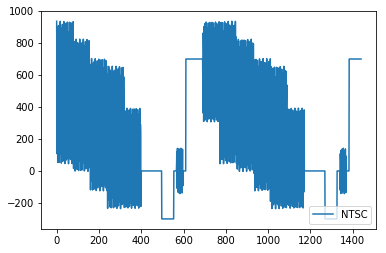

In [57]:
start=99
stop=101

plt.figure()
plt.plot((ntsc_numpy[720*start:720*stop]),label="NTSC")
plt.legend(loc='lower right')


# Modulacion negativa

Para ahorrar energia, de una analisis hecho entre la potencia que se transmitie para una imagen negra y para una imagen blanca, puede deducirse que invirtiendo la señal, se ahora potencia.

Ademas los pulsos de sincronismo quedan con modulacion maxima, siendo de utilidad para los circuitos de control automatico de ganancia de los receptores.

Vamos a invertir la señal y normalizarla de 0 a 1 para poder transmitirla en GNURadio


En un osciloscopio se observa de la siguiente manera

<img src="8.jpeg" width=700 height=700 />

In [59]:
f=open("onda.dat",'wb')
np.ndarray.tofile((700-ntsc_numpy)/1000,f,sep="",format="%f")
f.close()

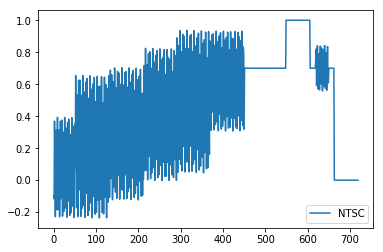

In [60]:
start=100
stop=101

plt.figure()
plt.plot((700-ntsc_numpy[720*start:720*stop])/1000,label="NTSC")
plt.legend(loc='lower right')


# GNURadio

<img src="gnuradio.png" width=700 height=700 />

# Evaluacion de resultados

<img src="7.jpeg" width=700 height=700 />

la HackRF es conectada a un demodulador de TV tektronix 1350 y la salida demodulada a un osciloscopio digital SIGLENT SDS 2302

Obteniendose nuevamente la señal de video compuesta

<img src="9.jpeg" width=700 height=700 />